Reading file: data/loadprofiles/baseline/single-family-detached/alameda/sam_optimized_load_profiles_alameda.csv


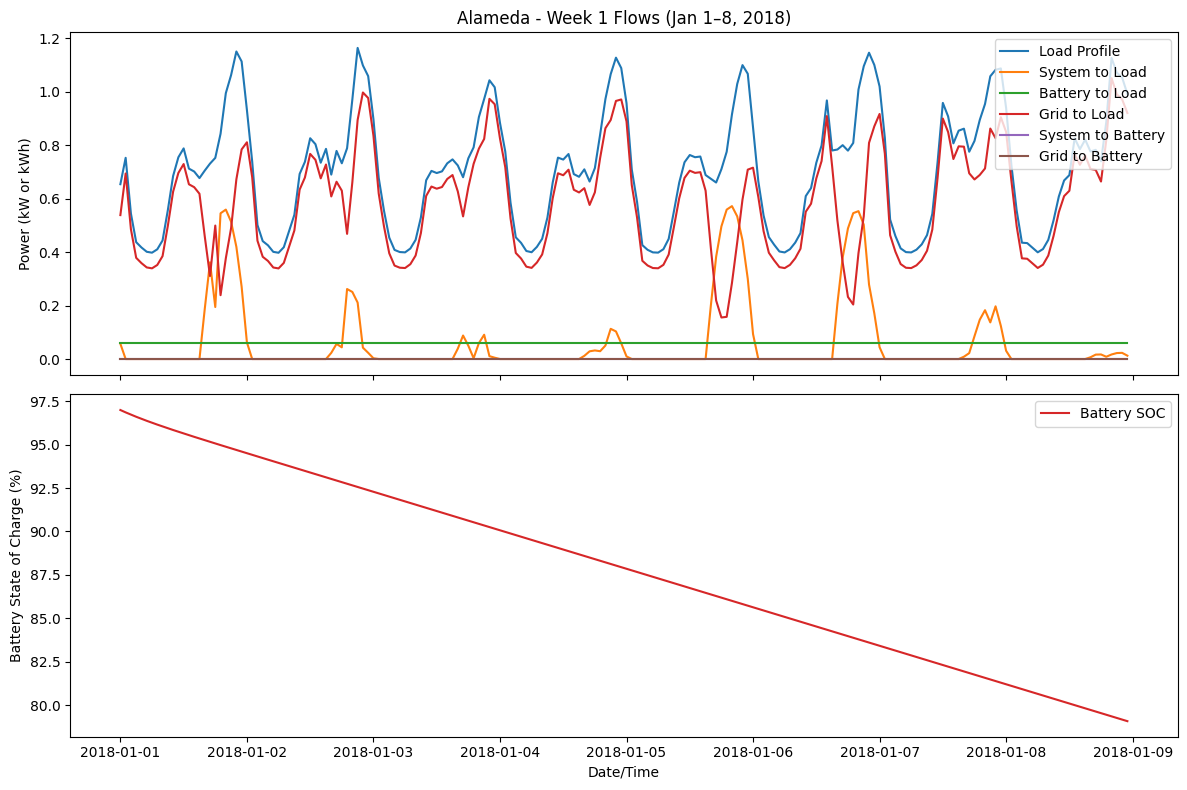

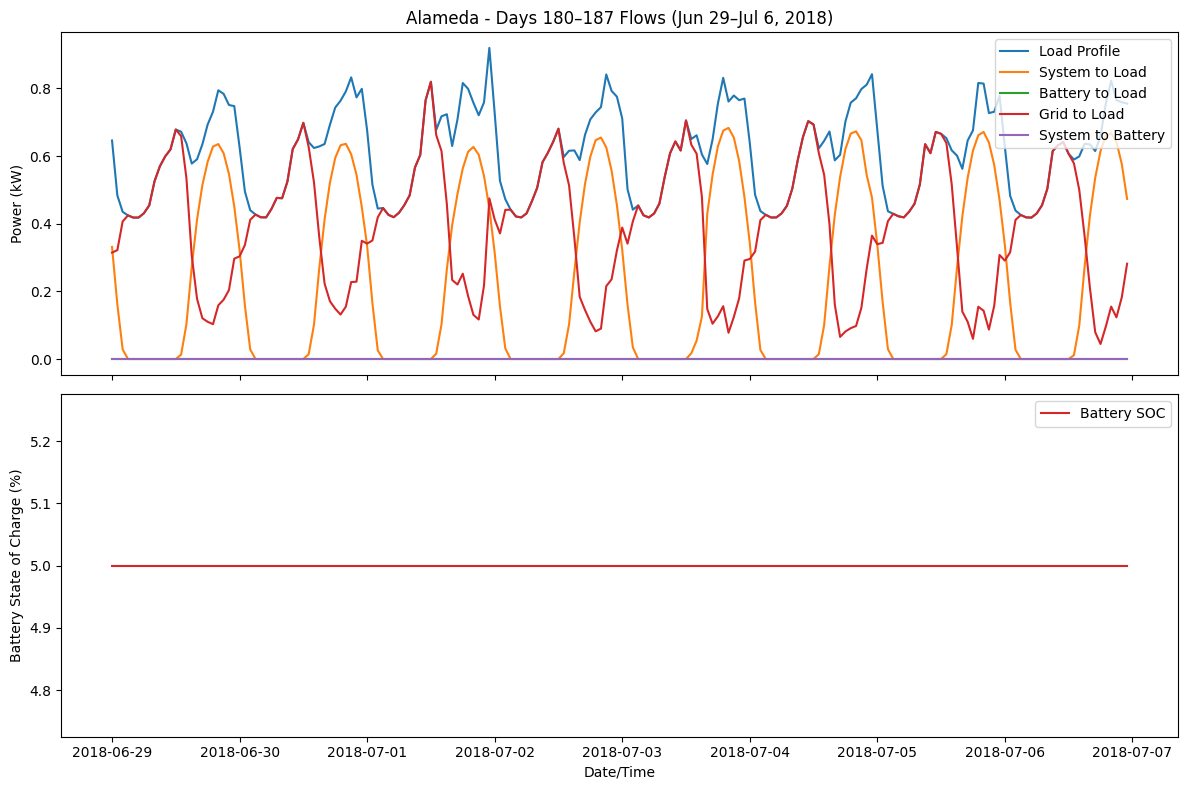

No file found for county 'contra_costa' at data/loadprofiles/baseline/single-family-detached/contra_costa/sam_optimized_load_profiles_contra_costa.csv
Reading file: data/loadprofiles/baseline/single-family-detached/marin/sam_optimized_load_profiles_marin.csv


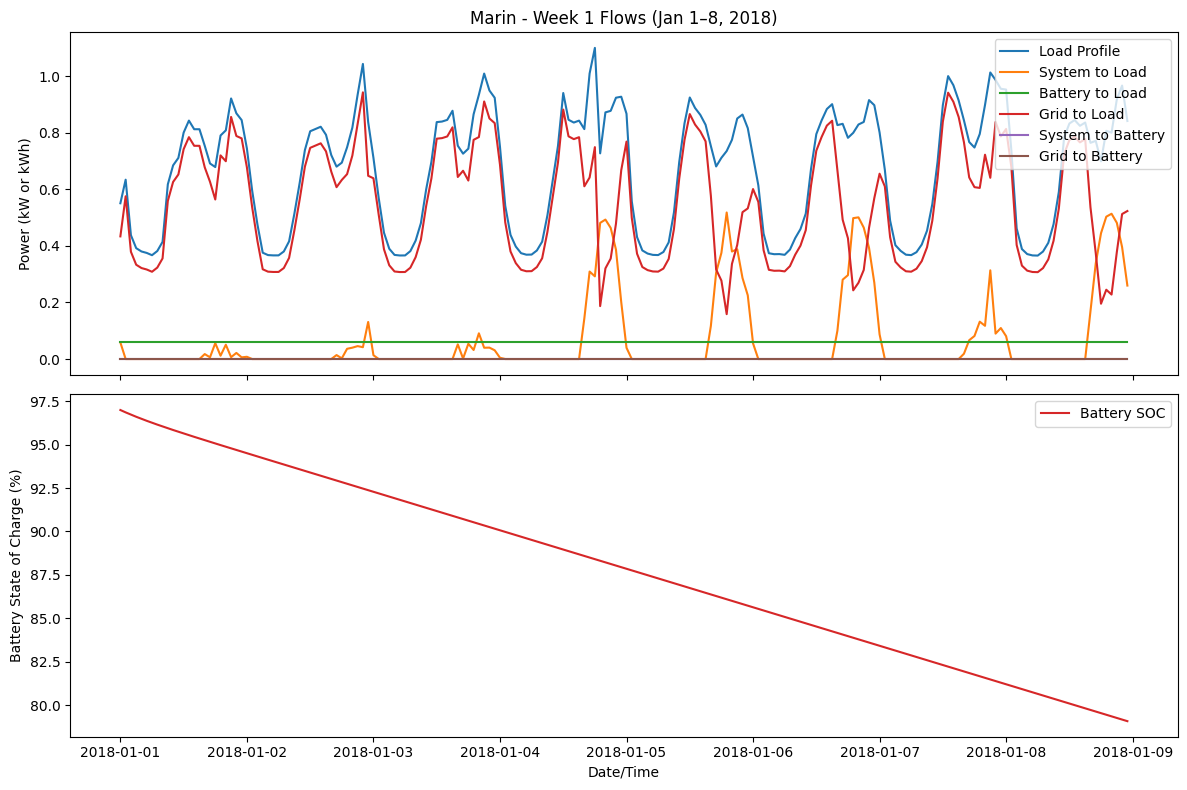

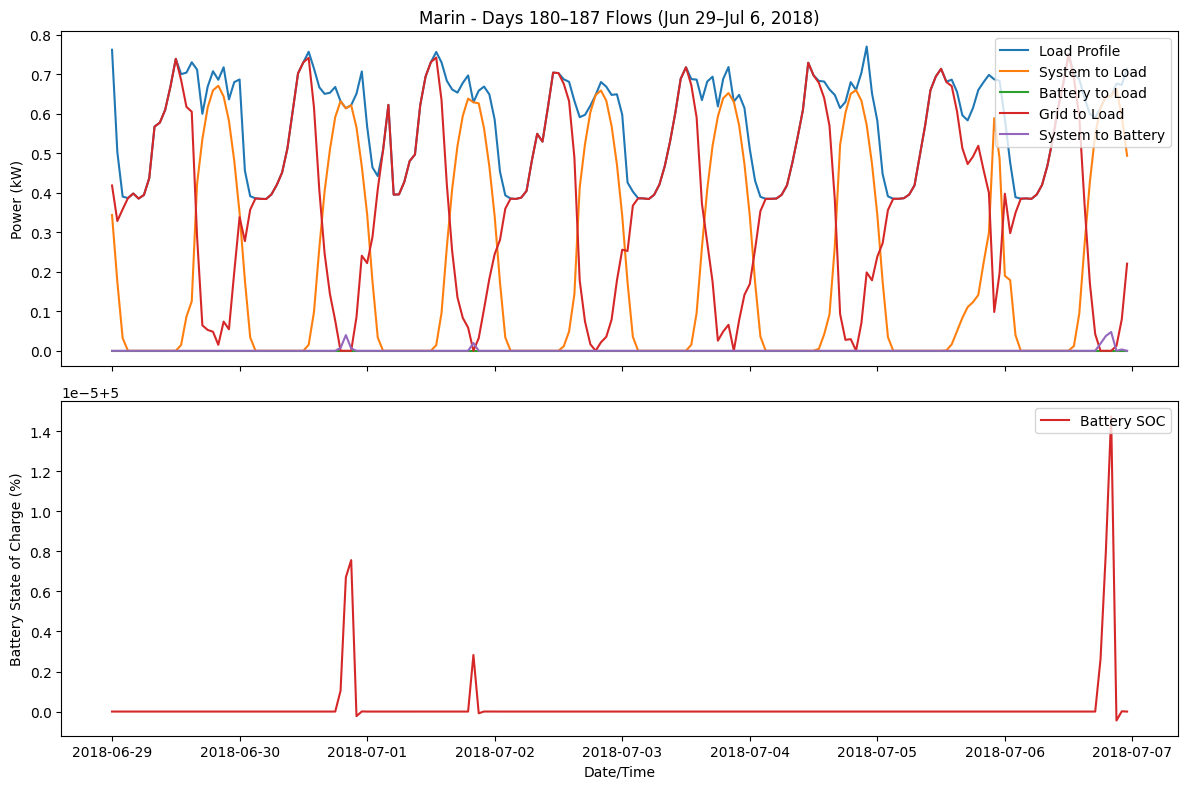

Reading file: data/loadprofiles/baseline/single-family-detached/napa/sam_optimized_load_profiles_napa.csv


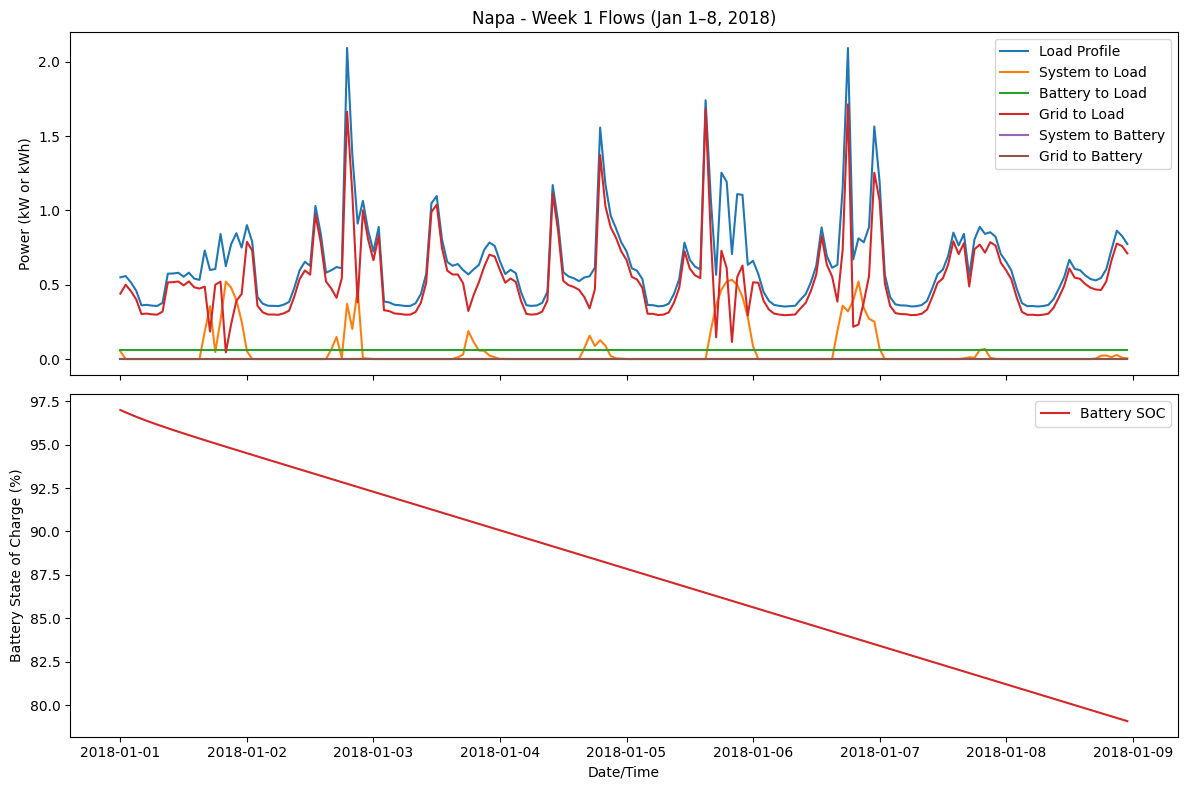

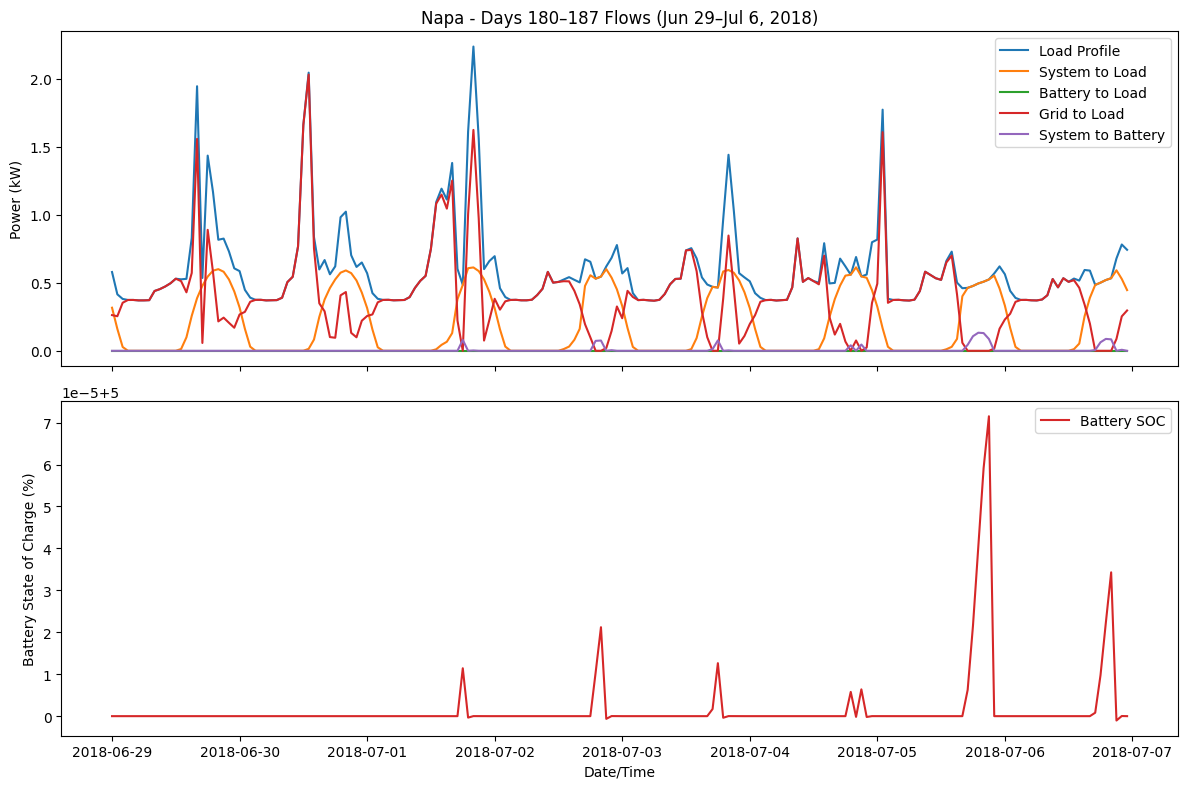

Reading file: data/loadprofiles/baseline/single-family-detached/sacramento/sam_optimized_load_profiles_sacramento.csv


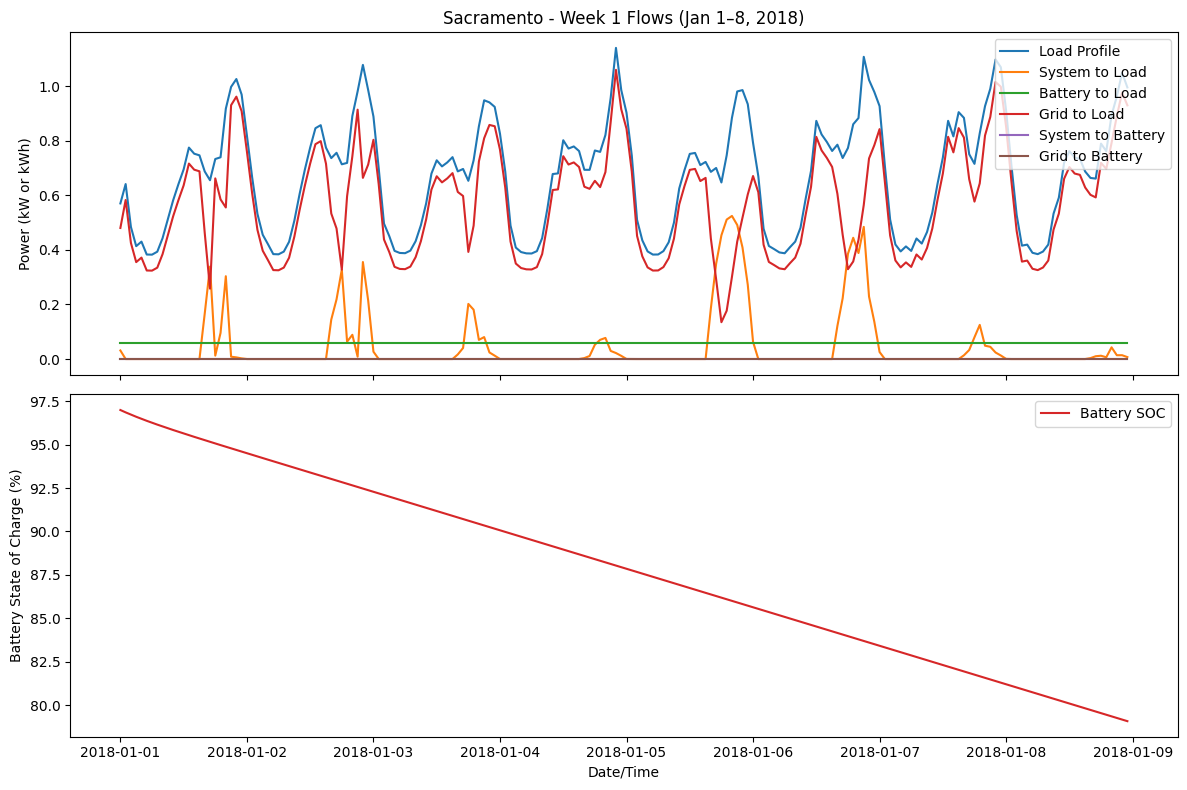

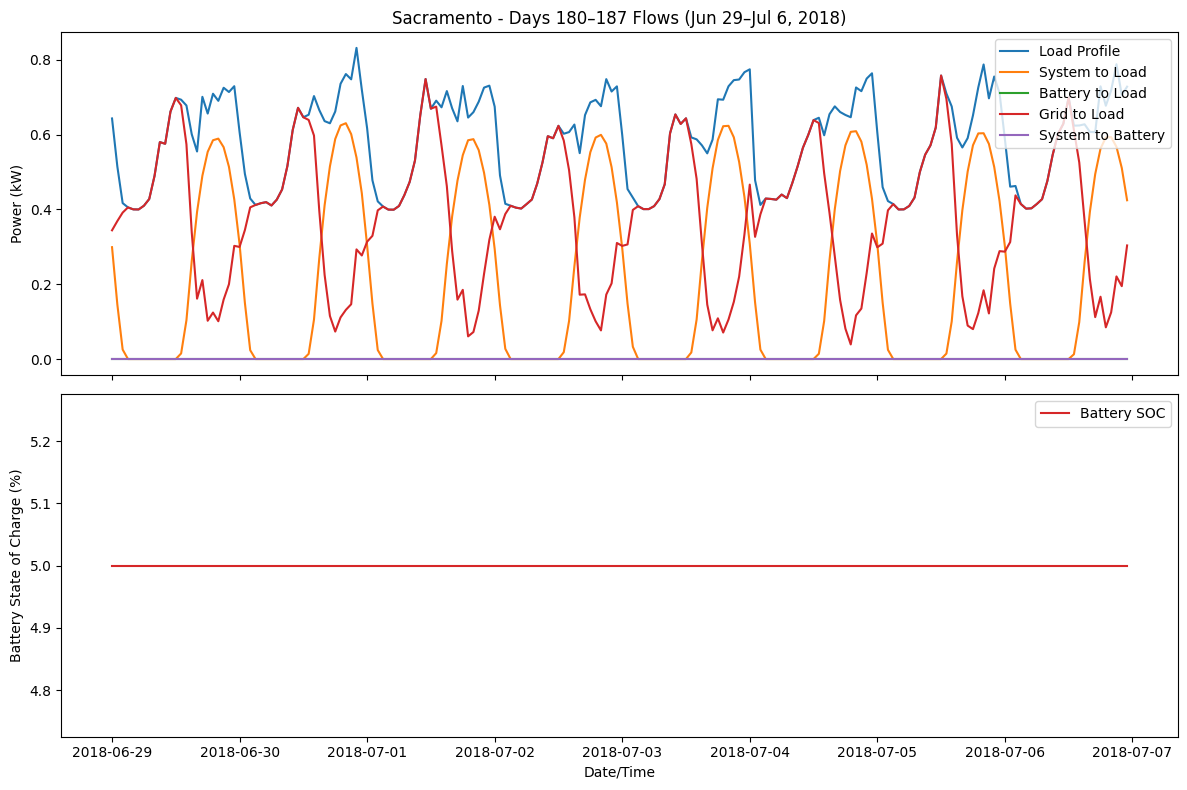

Reading file: data/loadprofiles/baseline/single-family-detached/fresno/sam_optimized_load_profiles_fresno.csv


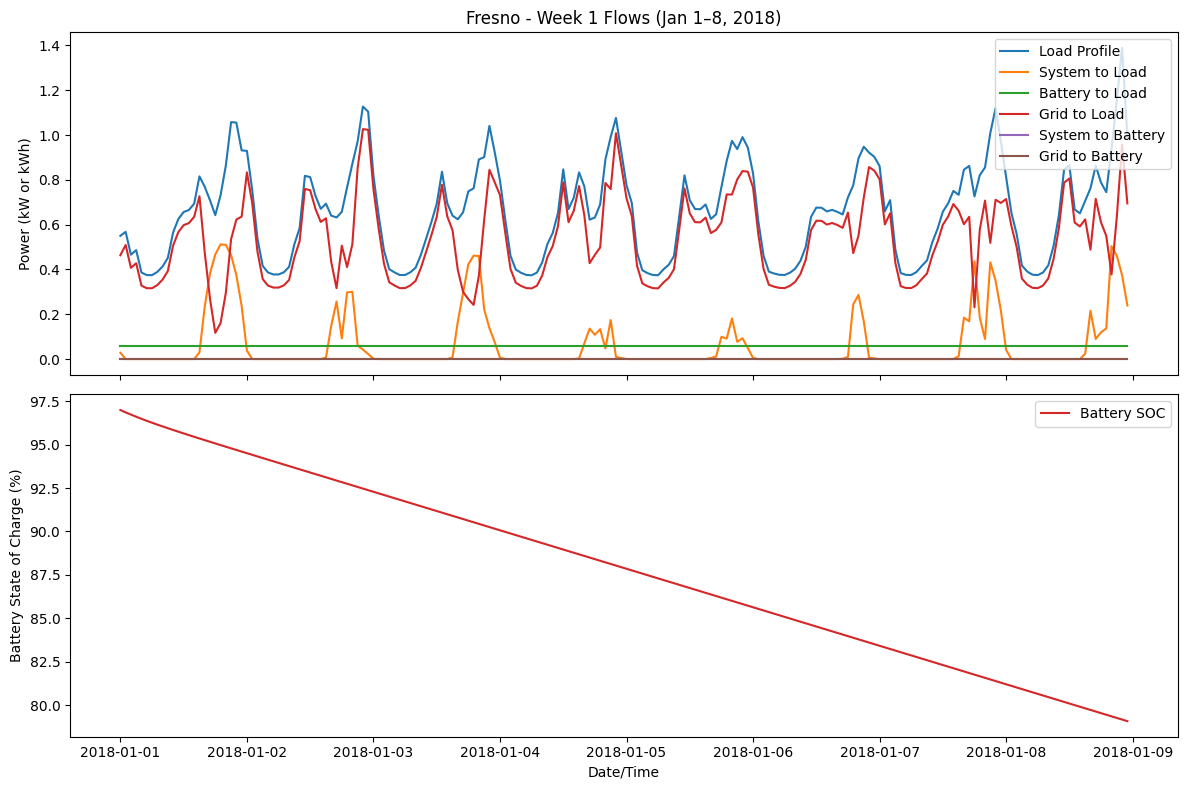

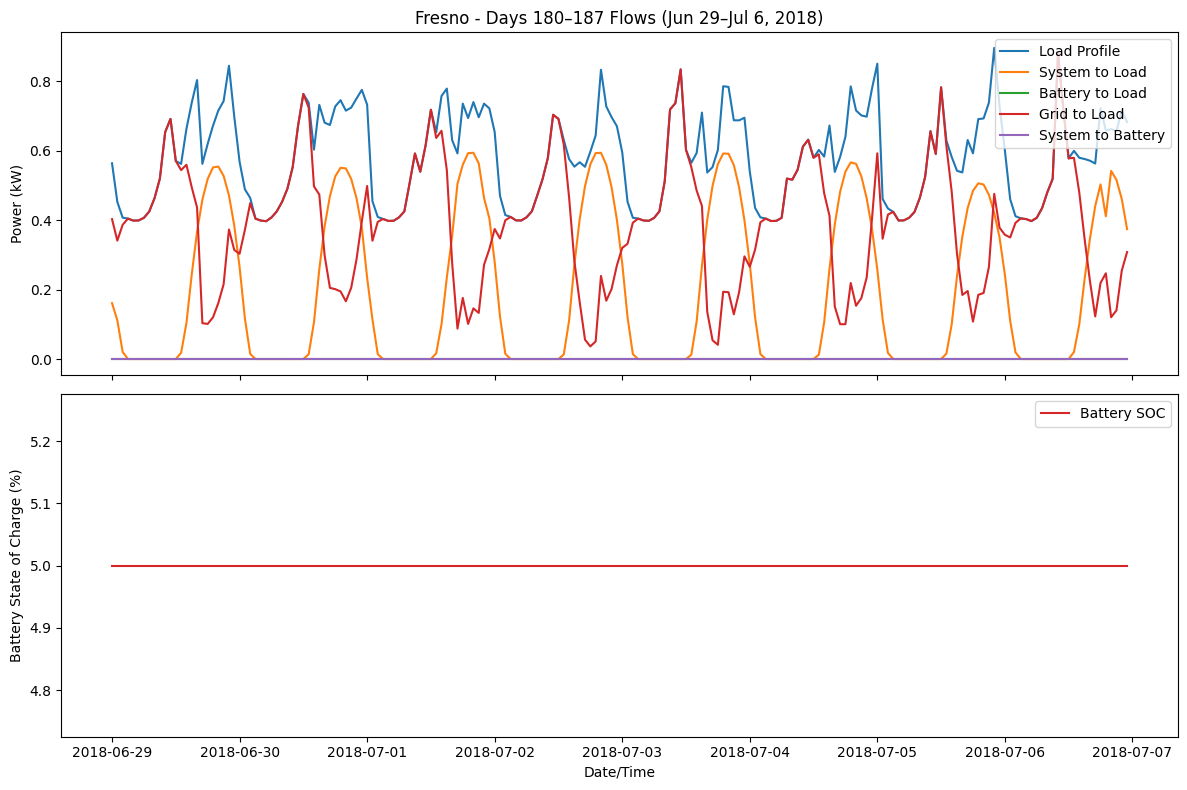

Reading file: data/loadprofiles/baseline/single-family-detached/merced/sam_optimized_load_profiles_merced.csv


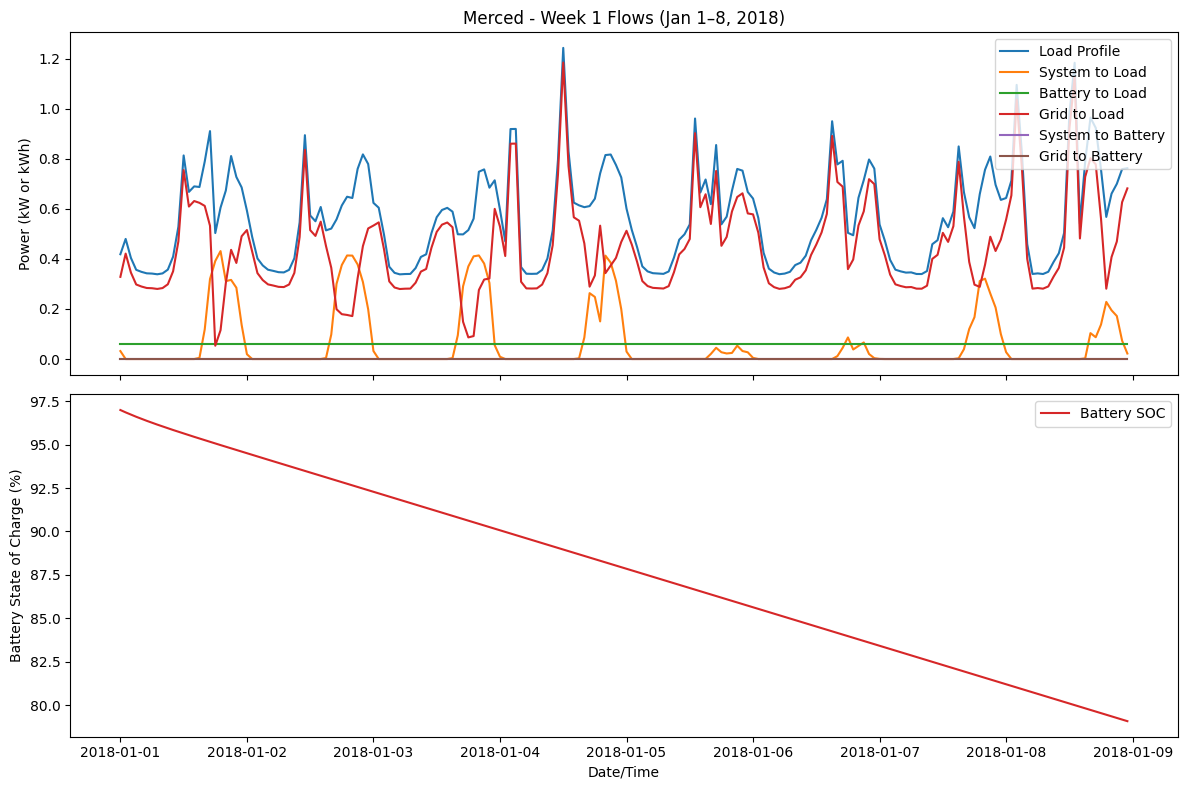

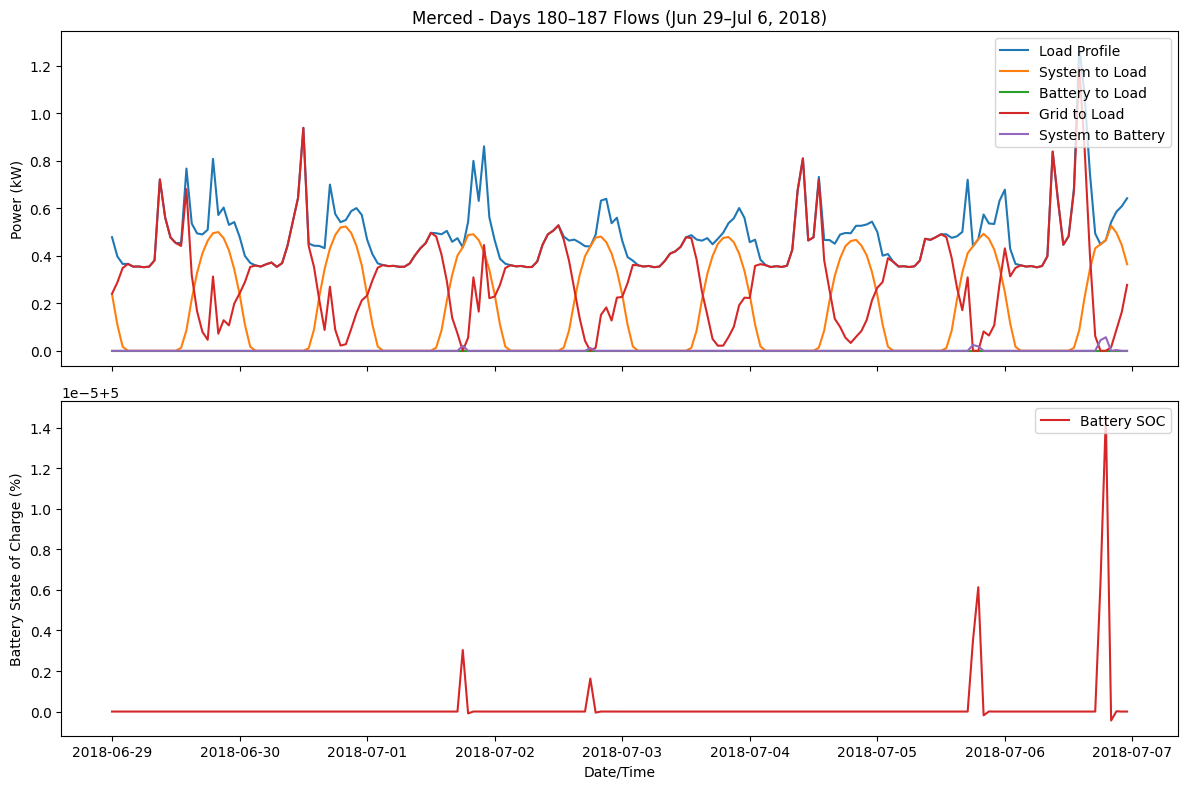

In [7]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

norcal_counties = ["alameda", "contra_costa", "marin", "napa", "sacramento"]  # 
central_counties = ["fresno", "merced"]  #
# socal_counties = ["los_angeles", "orange", "san_diego"]  #

all_counties = norcal_counties + central_counties

base_dir = "data/loadprofiles/baseline/single-family-detached"

# Day 1 is "2018-01-01"; day 8 ends at "2018-01-08 23:00:00"
# Day 180 is "2018-06-29"; day 187 ends at "2018-07-06 23:00:00"
week1_start, week1_end = "2018-01-01", "2018-01-08 23:00:00"
week180_start, week180_end = "2018-06-29", "2018-07-06 23:00:00"

for county in all_counties:
    file_pattern = os.path.join(base_dir, county, f"sam_optimized_load_profiles_{county}.csv")
    matching_files = glob.glob(file_pattern)
    
    if not matching_files:
        print(f"No file found for county '{county}' at {file_pattern}")
        continue
    
    file_path = matching_files[0]
    print(f"Reading file: {file_path}")

    df = pd.read_csv(
        file_path,
        parse_dates=[0],   # the first column has the timestamps
        index_col=0        # make the first column the DataFrame index
    )
    
    # Ensure columns have consistent names (they should match exactly the headers in your CSV)
    # e.g., "Load Profile", "System to Load", "Battery to Load", "Grid to Load",
    #       "Solar + Battery to Load", "Total Supply", "Difference",
    #       "System to Battery", "Battery SOC"
    
    # Subset the data for each time range
    df_week1 = df.loc[week1_start : week1_end]
    df_week180 = df.loc[week180_start : week180_end]

    # --- Week 1 ---
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)
    
    # Plot flows on the first axis
    ax1.plot(df_week1.index, df_week1["Load Profile"], label="Load Profile")
    ax1.plot(df_week1.index, df_week1["System to Load"], label="System to Load")
    ax1.plot(df_week1.index, df_week1["Battery to Load"], label="Battery to Load")
    ax1.plot(df_week1.index, df_week1["Grid to Load"], label="Grid to Load")
    ax1.plot(df_week1.index, df_week1["System to Battery"], label="System to Battery")
    ax1.plot(df_week1.index, df_week1["Grid to Battery"], label="Grid to Battery")
    ax1.set_title(f"{county.title()} - Week 1 Flows (Jan 1–8, 2018)")
    ax1.set_ylabel("Power (kW or kWh)")  # Adjust units as appropriate
    ax1.legend(loc="upper right")

    # Plot Battery SOC on the second axis
    ax2.plot(df_week1.index, df_week1["Battery SOC"], color="tab:red", label="Battery SOC")
    ax2.set_ylabel("Battery State of Charge (%)")
    ax2.set_xlabel("Date/Time")
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

    # --- Week 2 ---
    fig, (ax3, ax4) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)
    
    # Plot flows on the first axis
    ax3.plot(df_week180.index, df_week180["Load Profile"], label="Load Profile")
    ax3.plot(df_week180.index, df_week180["System to Load"], label="System to Load")
    ax3.plot(df_week180.index, df_week180["Battery to Load"], label="Battery to Load")
    ax3.plot(df_week180.index, df_week180["Grid to Load"], label="Grid to Load")
    ax3.plot(df_week180.index, df_week180["System to Battery"], label="System to Battery")
    ax1.plot(df_week180.index, df_week180["Grid to Battery"], label="Grid to Battery")
    ax3.set_title(f"{county.title()} - Days 180–187 Flows (Jun 29–Jul 6, 2018)")
    ax3.set_ylabel("Power (kW)")
    ax3.legend(loc="upper right")

    # Plot Battery SOC on the second axis
    ax4.plot(df_week180.index, df_week180["Battery SOC"], color="tab:red", label="Battery SOC")
    ax4.set_ylabel("Battery State of Charge (%)")
    ax4.set_xlabel("Date/Time")
    ax4.legend(loc="upper right")

    plt.tight_layout()
    plt.show()